In [1]:
# Loading in ggplot2 for data manipulation
library(ggplot2)

# Loading in dplyr for summary statistics
library(dplyr)

# Installing and loading in gridExtra library to have multiple graphs in a grid-like space
install.packages('gridExtra')
library(gridExtra)

# Installing and loading moments library to be able to calculate skewness values
install.packages('moments')
library(moments)


# Loading in rpart and rpart.plot for decision tree function for decision tree visualization
library(rpart)
install.packages('rpart.plot')
library(rpart.plot)

# Loading in randomForest for random forest function
install.packages('randomForest')
library(randomForest)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:gridExtra’:

    combine


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [2]:
# Loading in the adult_22_hclust csv file.
df <- read.csv('https://raw.githubusercontent.com/Cstan1987stat/health-survey-cluster-analysis/refs/heads/main/data/adult_22_hclust.csv')

# Changing the variable type of feature to factors that are needed.
df$Sex <- as.factor(df$Sex)
df$Cancer <- as.factor(df$Cancer)
df$Coronary_heart_disease <- as.factor(df$Coronary_heart_disease)
df$Depression <- as.factor(df$Depression)
df$Smoked_100_cig <- as.factor(df$Smoked_100_cig)
df$Anxiety <- as.factor(df$Anxiety)
df$Aerobic.Strength <- as.factor(df$Aerobic.Strength)
df$clusters_4_hclust <- as.factor(df$clusters_4_hclust)

# Creating a vector of numeric column names
num_cols <- c('Age','Weight','Height','Sleep_hours','Alcohol_drink_12m')
# Creating a vector of categorical column names
cat_cols <- c('Sex','Cancer','Coronary_heart_disease','Depression',
              'Smoked_100_cig', 'Anxiety','Aerobic.Strength')

# Printing off the first six rows.
print(head(df))

  Age    Sex Cancer Coronary_heart_disease Depression Smoked_100_cig
1  64   Male    Yes                    Yes         No            Yes
2  37 Female     No                     No         No             No
3  72 Female     No                     No         No             No
4  84 Female     No                     No         No             No
5  31 Female     No                     No         No            Yes
6  81 Female    Yes                     No         No             No
      Anxiety Height Weight Sleep_hours Aerobic.Strength Alcohol_drink_12m
1 Few times Y     74    235           8          Aerobic               108
2     Monthly     69    218           9          Aerobic                 0
3       Never     64    240           8          Neither                12
4 Few times Y     66    183           8          Neither                52
5     Monthly     69    156           8             Both                52
6 Few times Y     68    170           5          Neither           

The four clusters were obtained through the following steps:
1. Feature Selection and Transformation
 * The Education and Region features were removed.
 * Numeric columns were standard scaled, while categorical variables were one-hot encoded.
 * Each one-hot encoded feature was divided by the square root of the number of categories to balance feature contributions.
2. Dimension Reduction
 * The transformed dataset was reduced to six features using UMAP, a nonlinear dimensionality reduction technique.
3. Clustering Models and Evaluation
 * A K-Means Clustering model and three Hierarchical Clustering models (complete, single, and average linkage) were trained.
 * The models were evaluated based on silhouette scores, with the best score (0.60) coming from a Hierarchical Clustering model with average linkage using five clusters.
4. Final Cluster Selection
 * After reviewing cluster proportions, the four cluster solution was preferred as the five cluster solution had proportions varying by up to 15% suggesting imbalance. On the other hand, the four cluster model has proportions within 2% of each other, ensuring more balanced clusters.  

## Numerical Variable Analysis

### Grouped Statistics

In [3]:
# Looping through the numeric columns
for (i in num_cols){
  # Calculating mean, standard deviation, and skewness for each numeric column grouped by the clusters
  summary_df <- df %>%
    group_by(.data[['clusters_4_hclust']]) %>%
    summarize(mean = round(mean(.data[[i]]),2),
              sd = round(sd(.data[[i]]),2),
              skew = round(skewness(.data[[i]]),2)
    )
    # Printing numerical feature name
    cat(i,'\n')
    # Printing the summary stats
    print(summary_df)
    # Printing separating line
    cat('-----------------------------------\n')
}

Age 
# A tibble: 4 × 4
  clusters_4_hclust  mean    sd  skew
  <fct>             <dbl> <dbl> <dbl>
1 1                  56.2  16.2 -0.3 
2 2                  50.2  17.6  0.07
3 3                  54.0  17.0 -0.25
4 4                  48.3  17.4  0.09
-----------------------------------
Weight 
# A tibble: 4 × 4
  clusters_4_hclust  mean    sd  skew
  <fct>             <dbl> <dbl> <dbl>
1 1                  193.  37.9  0.37
2 2                  161.  35.3  0.74
3 3                  169.  38.0  0.58
4 4                  196.  35.4  0.57
-----------------------------------
Height 
# A tibble: 4 × 4
  clusters_4_hclust  mean    sd  skew
  <fct>             <dbl> <dbl> <dbl>
1 1                  69.4  3.14 -0.38
2 2                  64.2  2.48  0.12
3 3                  64.3  2.62  0.21
4 4                  69.8  2.76 -0.04
-----------------------------------
Sleep_hours 
# A tibble: 4 × 4
  clusters_4_hclust  mean    sd  skew
  <fct>             <dbl> <dbl> <dbl>
1 1                  7.03 

* **Age** : Cluster 1 is the oldest on average (56.2 years) while Cluster 4 is the youngest on average (48.3 years). Cluster 2 has the highest standard deviation (17.6) while Cluster 1 has the smallest standard deviation (16.2). Cluster 2 and 4 are slightly positively skewed while Cluster 1 and 3 are slightly negatively skewed.

* **Weight** : Cluster 4 is the heaviest on average (196 pounds) while Cluster 2 is the lightest on average (161 pounds). Cluster 3 has the highest standard deviation (38) while Cluster 2 has the smallest standard deviation (35.3). Every cluster is slightly positively skewed.

* **Height** : Cluster 4 is the tallest on average (69.8 inches) while Cluster 2 is the shortest on average (64.2 inches). Cluster 1 has the highest standard deviation (3.14) while Cluster 2 has the smallest standard deviation (2.48). Clusters 1 and 4 are slightly negatively skewed while Cluster 2 and 3 are slightly positively skewed.

* **Sleep_hours** : Cluster 3 slept the most on average (7.16 hours per night) while Cluster 1 slept the fewest on average (7.03 hours per night). Cluster 3 has the highest standard deviation (1.78) while Cluster 2 has the smallest standard deviation (1.09). Clusters 1,2, and 4 are slightly negatively skewed while Cluster 3 is positively skewed.

* **Alcohol_drink_12m** : Cluster 1 drank the most days from the past 12 months on average (132) while Cluster 2 drank the fewest days from the past 12 months on average (41). Cluster 1 has the highest standard deviation (143) while Cluster 2 has the smallest standard deviation (58.3). All clusters are positively skewed, with cluster 2 being the most.


**Main Takeaways**
* Clusters 1 and 4 are similar in height and weight.
* Cluster 2 and 3 are similar in height and fairly similar in weight.
* Clusters 1 and 4 are taller and heavier than Clusters 2 and 3.
* Cluster 3 has the only positive skew when it comes to sleep hours, indicating some individuals sleep significantly more and thus inflate the mean


### Grouped Boxplots

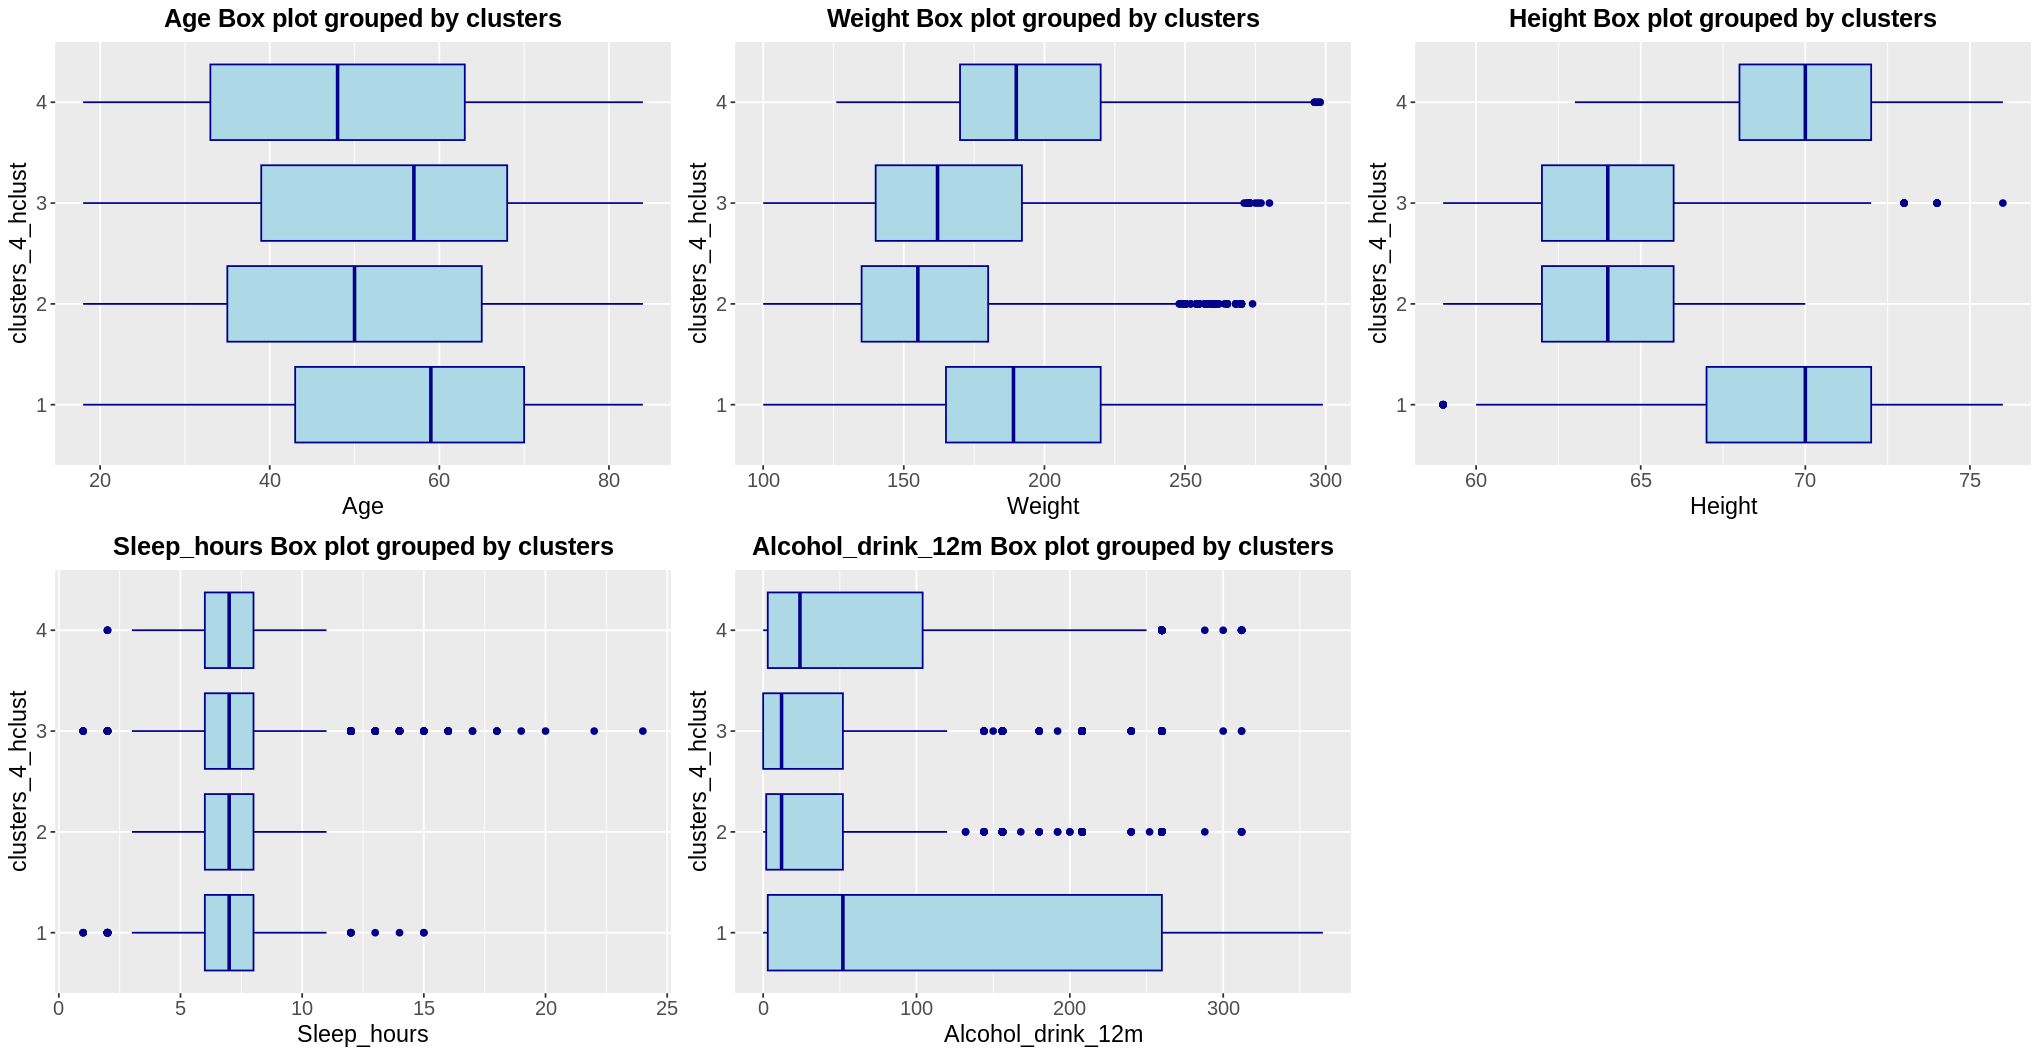

In [4]:
# Changing the size of the plot
options(repr.plot.width = 17, repr.plot.height = 8.8)

# Function to create boxplot for each numeric column grouped by clusters.
plot_boxplot <- function(data, col_name) {
  ggplot(df, aes(x = .data[[col_name]], y = .data[['clusters_4_hclust']])) +

    # Add boxplot with custom colors
    geom_boxplot(fill = "lightblue", color = "darkblue") +
    # Add title and x-axis label
    labs(title = paste0(col_name, ' Box plot grouped by clusters'), x = col_name) +
    # Adjusting the text appearance.
    theme(axis.text.x = element_text(size=12),
      axis.text.y = element_text(size=12),
      axis.title.x = element_text(size=14),
      axis.title.y = element_text(size=14),
      plot.title = element_text(size=15.2, hjust = 0.5, face='bold'),
      plot.subtitle = element_text(size=14, hjust=0.5))
}

# Create a list of boxplots for each numeric column
plots <- lapply(names(df[, num_cols]), function(col_name) {
  plot_boxplot(df[, num_cols], col_name)
})

# Arranging all the plots in a grid layout with 3 columns
grid.arrange(grobs = plots, ncol = 3)

* **Age** : Decent overlap in the IQR's for all clusters. The middle 50% of values for Cluster 1 can be the greatest while those with Cluster 4 are the smallest.
* **Weight** : While there is overlap, the middle 50% of values can be greater for Clusters 1 and 4 compared to Custers 2 and 4.
* **Height** : The IQR's (middle 50% values) for Clusters 1 and 4 don't even overlap with the IQR's for Cluster 2 and 4 (greater for Cluster 1 and 4).
* **Sleep_hours** : All IQR's seem to overlap completely.
* **Alcohol_drink_12m** :  While the IQR's overlap, Cluster 1 has a much wider IQR compared to the others. Cluster 4 also shows a wider IQR than Clusters 2 and 3, which seem nearly identical in IQR size.

### Grouped Density Plots

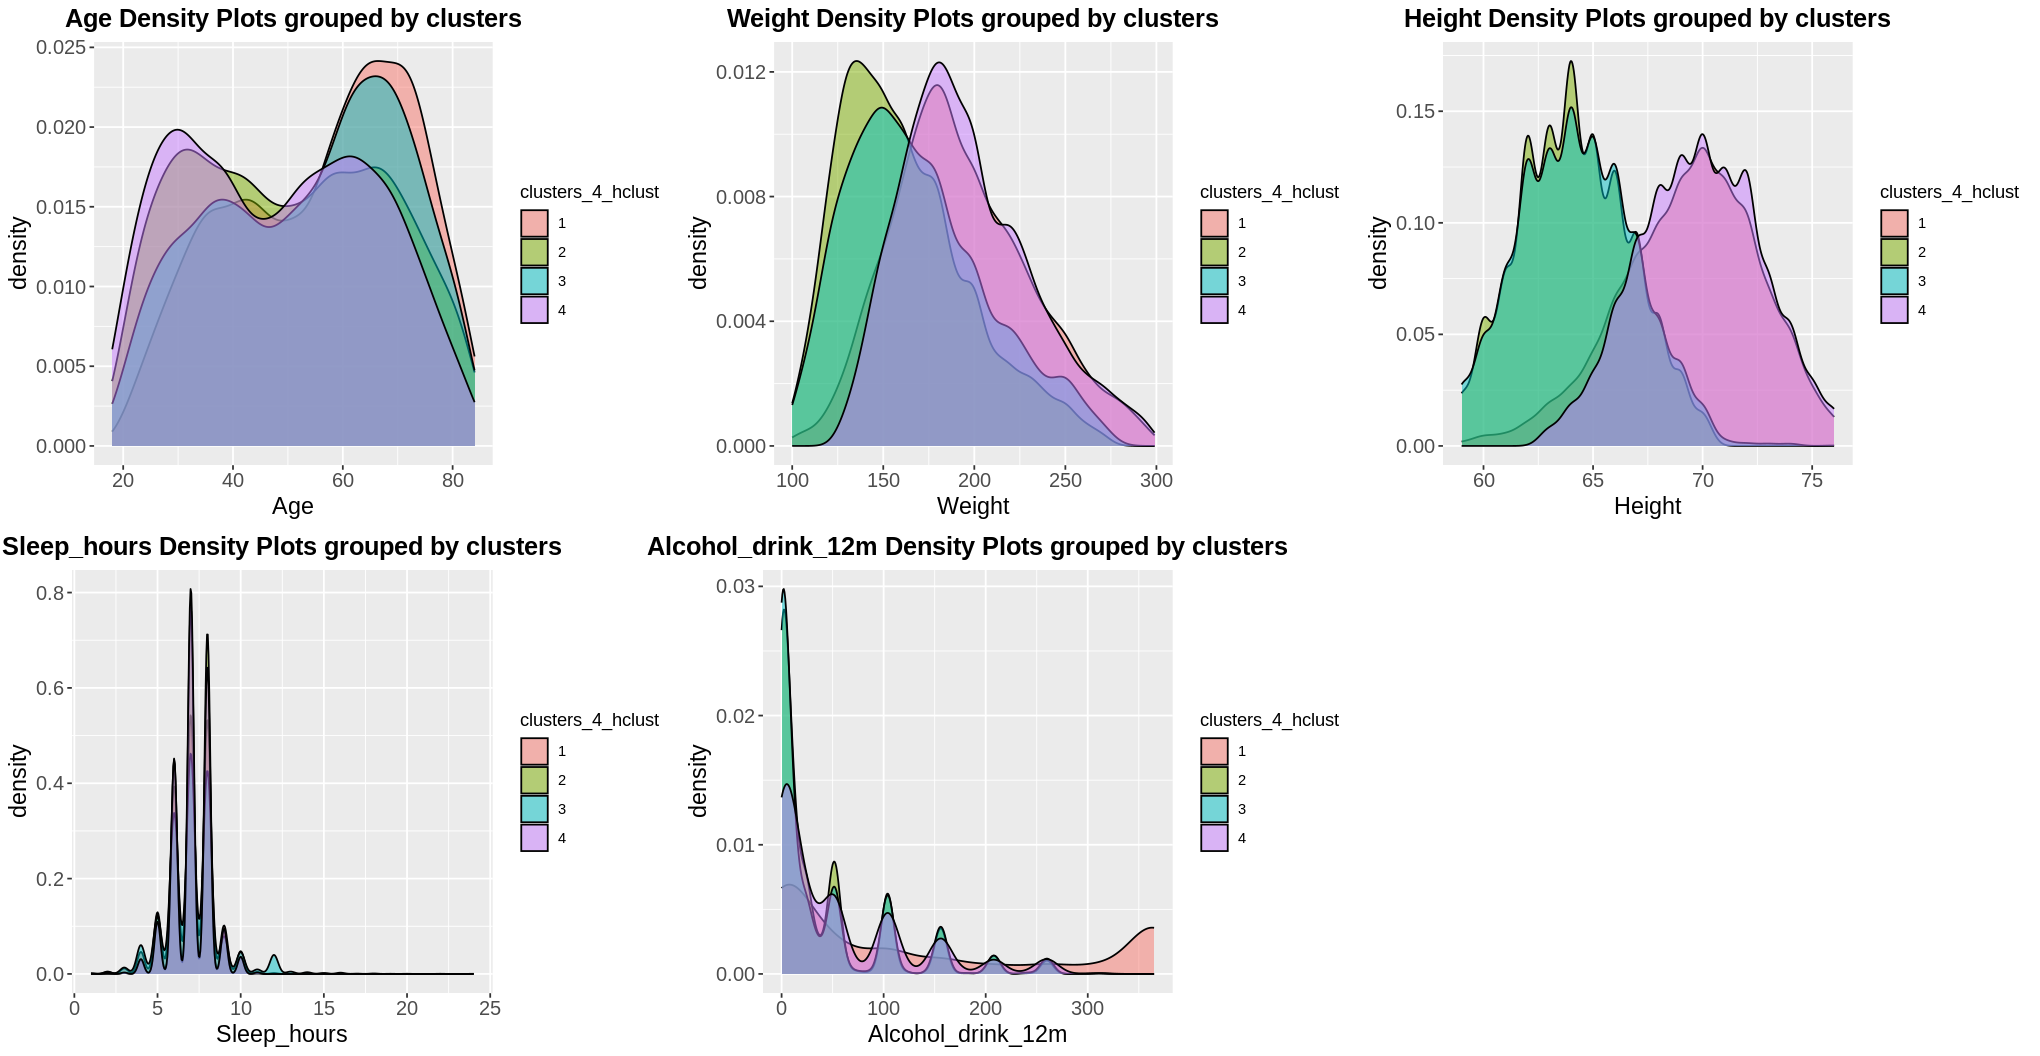

In [5]:
# Changing the size of the plot
options(repr.plot.width = 17, repr.plot.height = 8.8)

# Function to create grouped density plot for each numeric column grouped by clusters.
plot_density <- function(data, col_name) {
  ggplot(df, aes(x = .data[[col_name]], fill = .data[['clusters_4_hclust']])) +

    # Add density with custom colors
    geom_density(alpha=0.5) +
    # Add title and x-axis label
    labs(title = paste0(col_name, ' Density Plots grouped by clusters'), x = col_name) +
    # Adjusting the text apperance.
    theme(axis.text.x = element_text(size=12),
      axis.text.y = element_text(size=12),
      axis.title.x = element_text(size=14),
      axis.title.y = element_text(size=14),
      plot.title = element_text(size=15.2, hjust = 0.5, face='bold'),
      plot.subtitle = element_text(size=14, hjust=0.5))
}

# Create a list of density for each numeric column
plots <- lapply(names(df[, num_cols]), function(col_name) {
  plot_density(df[, num_cols], col_name)
})

# Arranging all the plots in a grid layout with 3 columns
grid.arrange(grobs = plots, ncol = 3)

* **Age** : Clusters 1 and 3 show higher densities bewteen 60 and 80 years old, while  Clusters 2 and 4 have greater densities between 20 and 40 years old. All clusters have lower densities between 40 and 60 years of age.
* **Weight** : All clusters are positively skewed. Clusters 1 and 4 how the highest density between 150 and 200 pounds, while Clusters 2 and 3  peak between 100 and 150 pounds.
* **Height** : Clusters 1 and 4 are negatively skewed, while Clusters 2 and 3 are positively skewed. The greatest densities for Clusters 1 and 4 occur at around 70 inches and 62-63 inches for Clusters 2 and 3. The prescence of multiple peaks suggests possible ordinal characteristics in this variable.
* **Sleep_hours** : All clusters are positively skewed. The prescence of distinct multi-peaks suggest this may be more ordinal than continuous.
* **Alcohol_drink_12m** : All clusters are positively skewed, with the highest density occuring at around 0 days for all clusters; but cluster 2 and 3 seem to be higher. Similiar to *Sleep_hours*, distinct multi-peaks may indicate this is ordinal.

### Statistical Tests

While it may seem helpful to test whether the differences between clusters are statistically significant, a key assumption behind tests like ANOVA and the chi-square test, independence of observations, is violated here.

The four clusters were created using six dimensions that came from the original data via UMAP. Since the clustering was based on those dimensions, the structure and relationships in the original data are still present and directly influence how the clusters were formed. In other words, the clusters were made to be different based on those features.

Because of that, it makes sense that people in the same cluster are similar to each other, and that clusters differ from one another, not due to random variation, but because of how the clusters were built. That breaks the independence assumption and makes traditional significance testing not appropriate in this case.

## Categorical Variable Analysis

### Stacked Proportion Plot

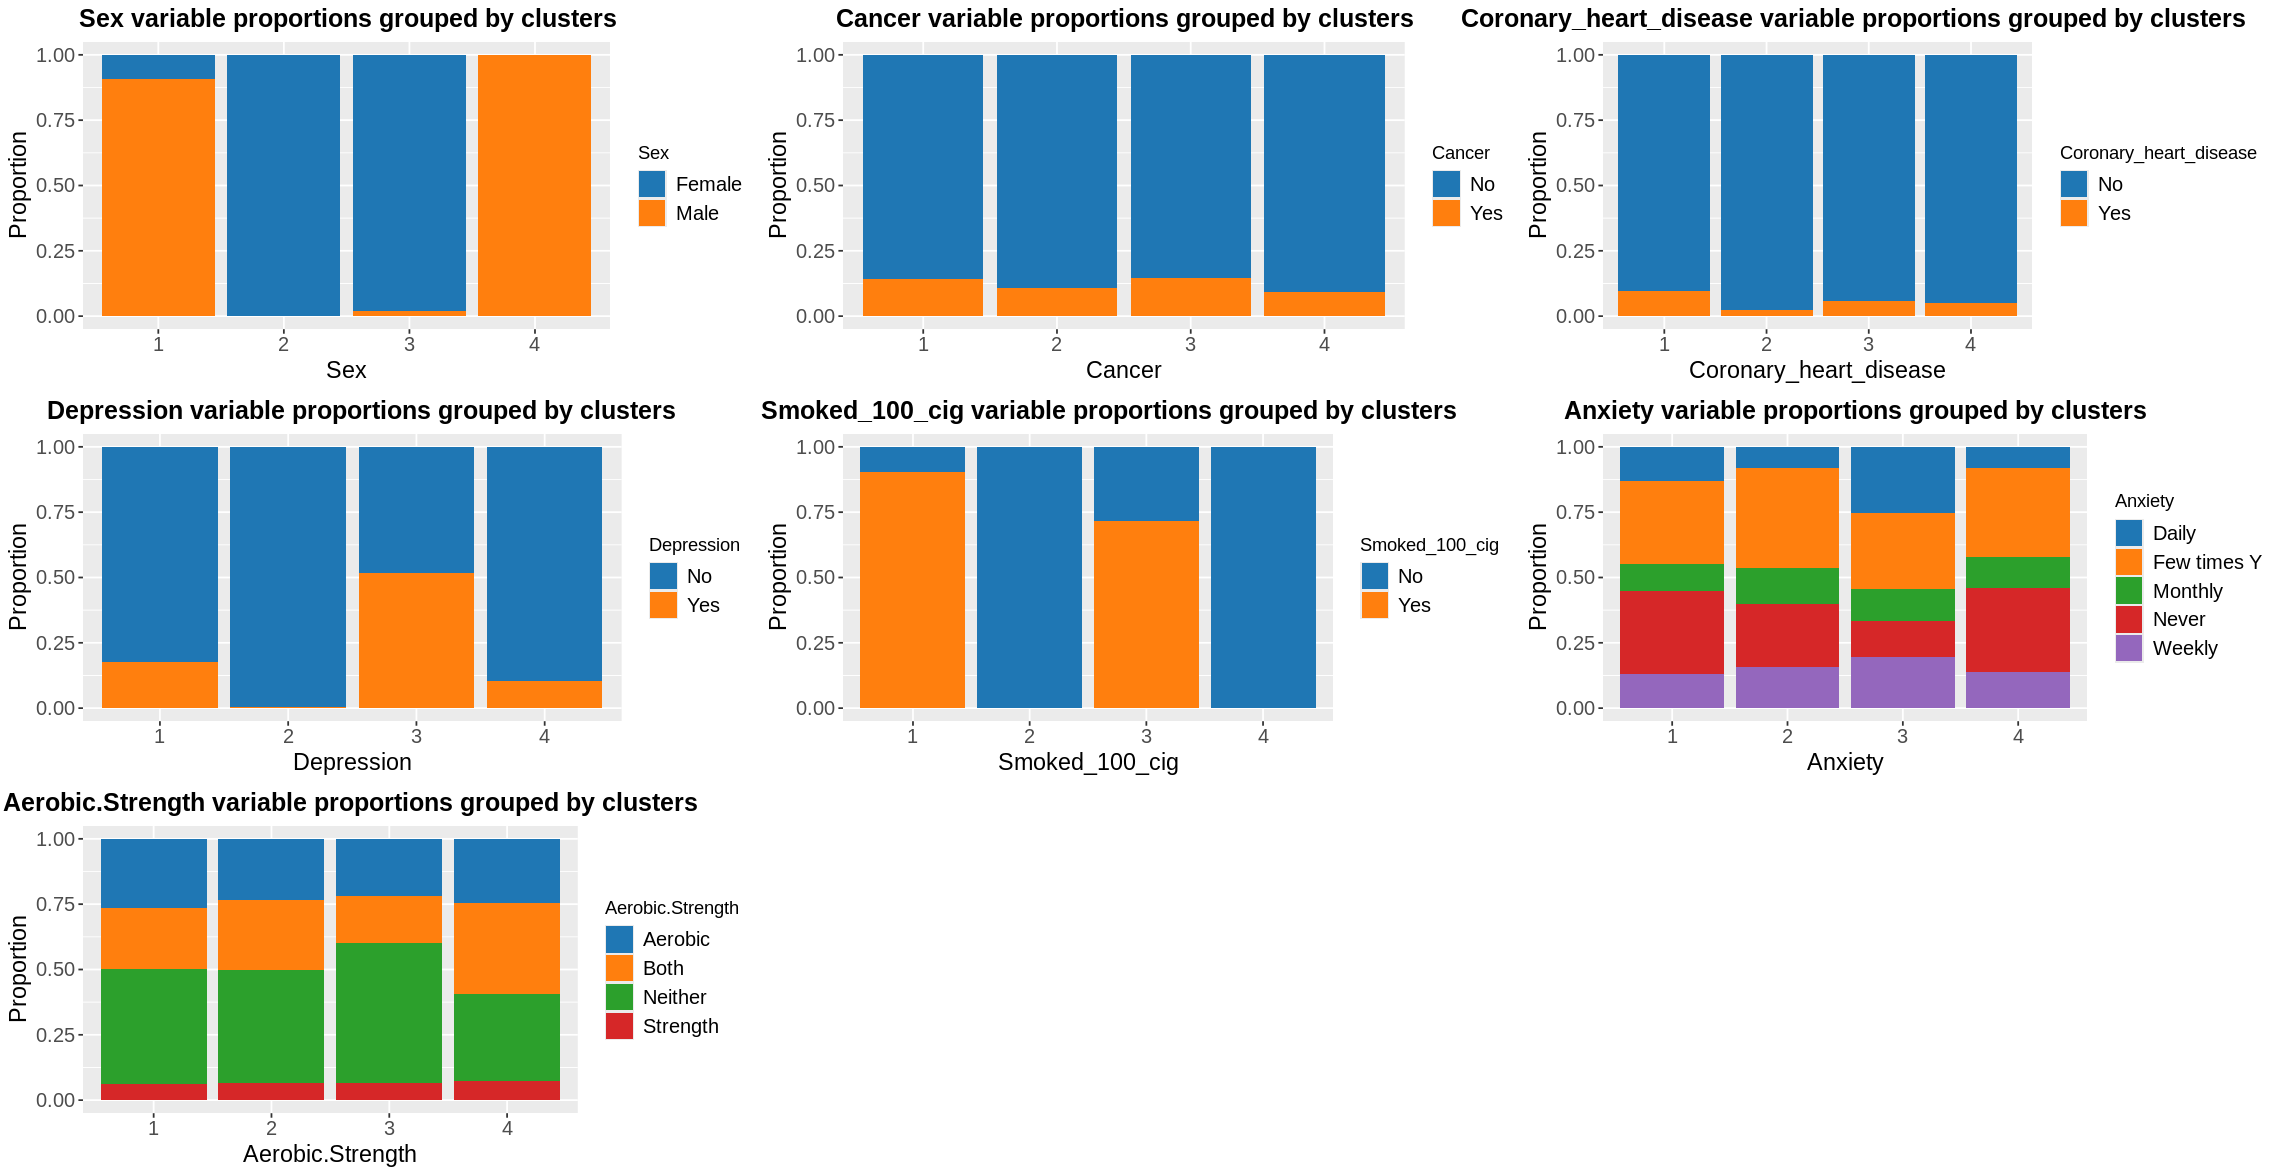

In [6]:
# Changing the size of the plot
options(repr.plot.width = 19, repr.plot.height = 9.8)

# Creating vector of differnet colors to be used
colors <- c("#1F77B4", "#FF7F0E", "#2CA02C", "#D62728",
            "#9467BD", "#8C564B", "#E377C2", "#17BECF",
            "#BCBD22", "#AEC7E8")

# Function to create proportion plot for each categorical column grouped by clusters.
plot_proportion_plot <- function(data, col_name) {
  ggplot(df, aes(x = .data[['clusters_4_hclust']], fill = .data[[col_name]])) +
    # Add plot
    geom_bar(position = 'fill') +
    # Add title, x-axis label, and y-axis label
    labs(title = paste0(col_name, ' variable proportions grouped by clusters'), x = col_name, y = 'Proportion') +
    # Add custom colors
    scale_fill_manual(values = colors) +
    # Adjusting the text appearance
    theme(axis.text.x = element_text(size=12),
          axis.text.y = element_text(size=12),
          axis.title.x = element_text(size=14),
          axis.title.y = element_text(size=14),
          plot.title = element_text(size=15, hjust = 0.4, face='bold'),
          plot.subtitle = element_text(size=14, hjust=0.5),
          legend.text = element_text(size=12))
}

# Create a list of proportion plots for each categorical column
plots <- lapply(names(df[, cat_cols]), function(col_name) {
  plot_proportion_plot(df[, cat_cols], col_name)
})

# Arranging all the plots in a grid layout with 3 columns
grid.arrange(grobs = plots, ncol = 3)

* **Sex** : Clusters 1 and 4 are male dominanted while Clusters 2 and 3 are female dominated.
* **Cancer** : All Clusters are dominated by those with no history of cancer.
* **Coronary_heart_disease:** : All Clusters are dominated by those with no history of coronary heart disease.
* **Depression** : Clusters 1,2 and 4 are all dominated by those with no history of depression. Cluster 3 seems to be fairly split between those with a history of depression and those without a history of depression.
* **Smoked_100_cig** : Clusters 1 and 3 are mainly made up by those who have smoked at least 100 cigarettes while Clusters 2 and 4  are dominated by those who haven't smoked at least 100 cigarettes.
* **Anxiety** : Clusters 1 and 4 have a fairly equal mix of individuals who experience anxious thoughts a few times a year or never, followed by a fairly balanced distribution of those experiencing anxiety daily, weekly, and monthly. Cluster 2 is mostly made up of individuals who experience anxious thoughts a few times a year, followed by never, weekly, monthly, and daily. Cluster 3 is dominated by those who experience anxiety a few times per year, followed closely by daily, monthly and never in fairly equal proportions, then weekly.
* **Aerobic.Strength** : Cluster 1 is mostly composed of individuals meeting neither guideline, followed by only aerobic, both, and then strength. Cluster 2 is mostly made up of individuals meeting neither guideline, followed by both, aerobic, and strength. Cluster 3 has the largest proportion of individuals meeting neither guideline, followed by aerobic, both, and strength. Cluster 4 is dominated by individuals meeting both guidelines, followed by neither, aerobic, and strength.


### Decision Tree

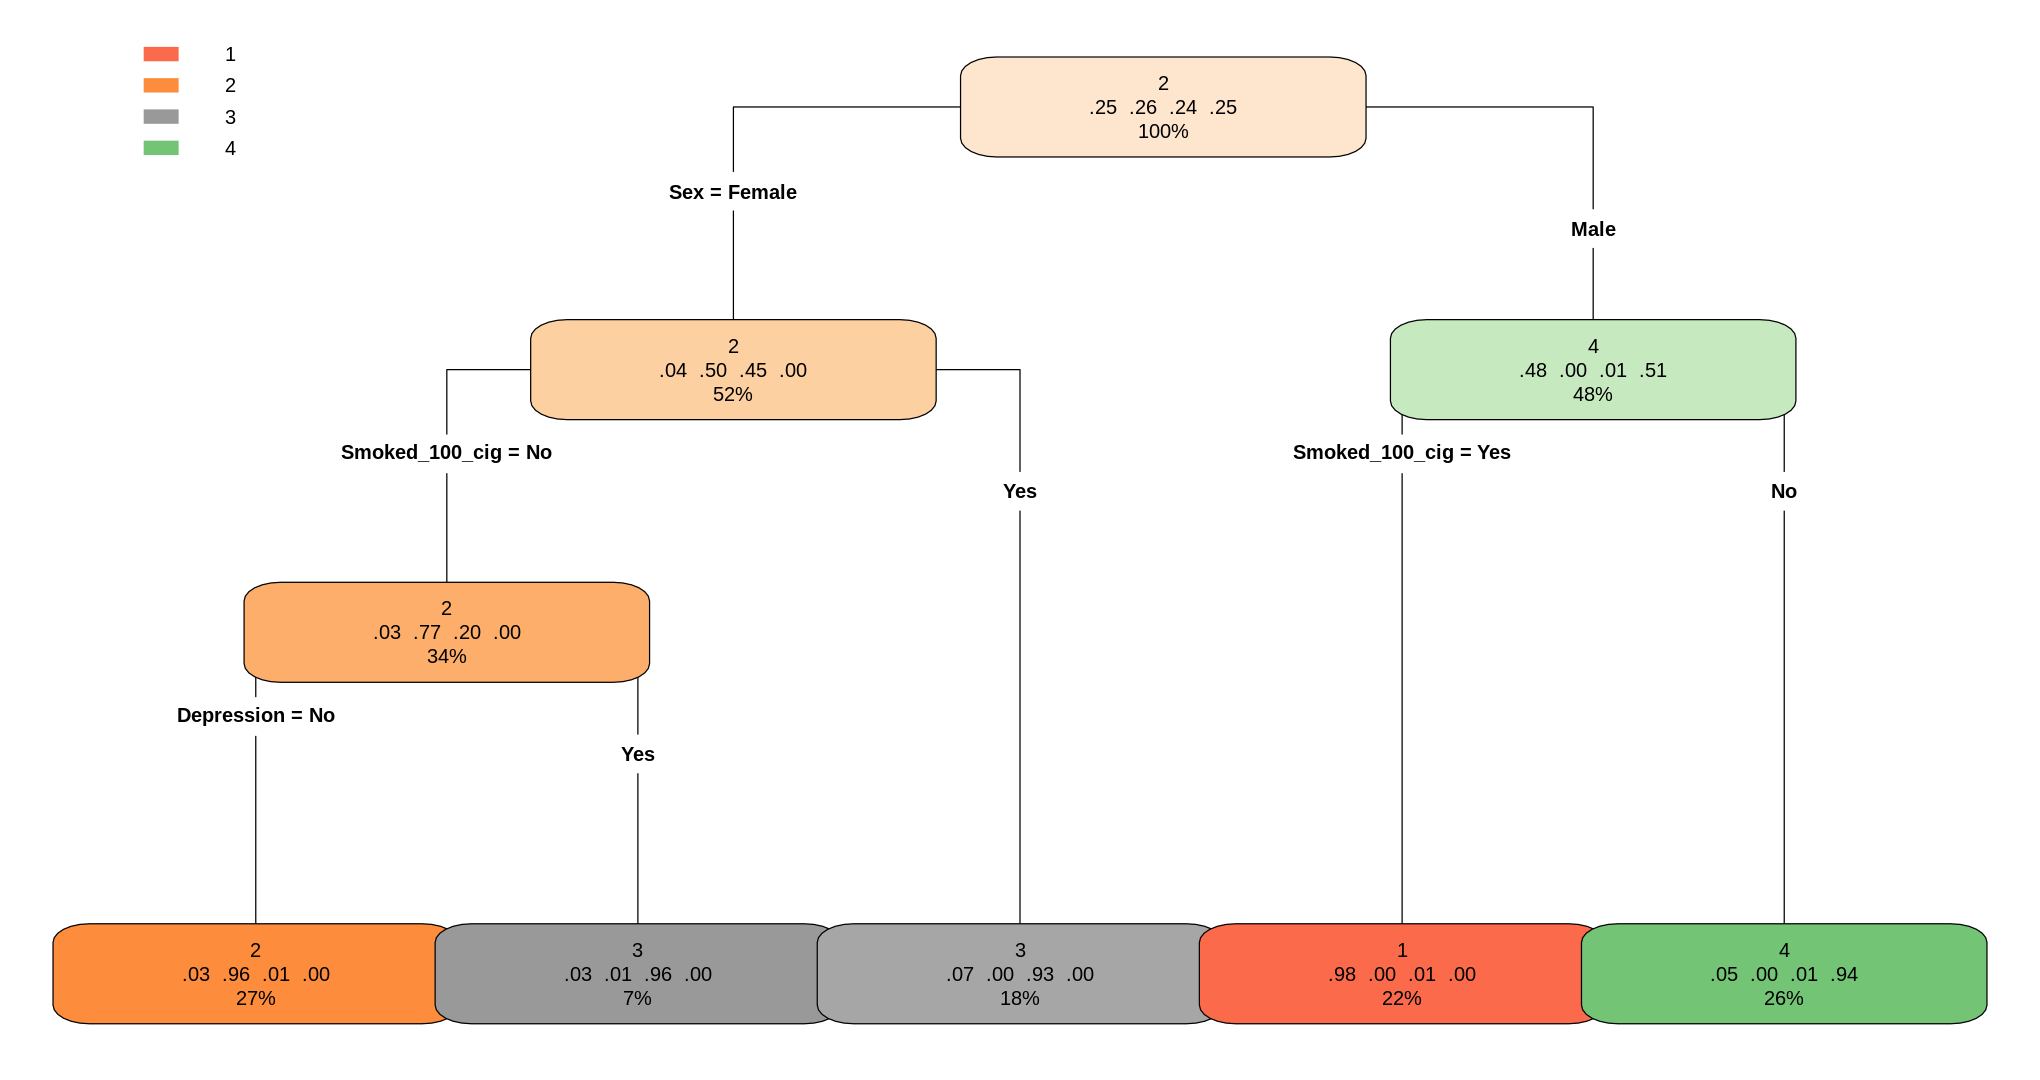

In [7]:
# Setting seed for reproducibility
set.seed(123)

# Fitting a decision tree classifier on the 4 clusters using all the categorical columns as predictors.
# maxdepth limits the tree depth beyond the parent node, allowing a maximum of 4 splits
dt <- rpart(df$clusters_4_hclust ~ .,
            data = df[, c(cat_cols)],
            method = "class",
            maxdepth = 4)

# Visualizing the tree, specifying white background, and adjusting dimensions
par(bg = "white")
options(repr.plot.width=17, repr.plot.height=9)
rpart.plot(dt, type=4, extra=104, cex=1)

* Adults who are female, have not smoked 100 cigarettes, and have no history of depression most likely belong to Cluster 2.
* Adults who are female, have not smoked 100 cigarettes, and have a history of depression most likely belong to Cluster 3.
* Adults who are female and have smoked 100 cigarettes most likely belong to Cluster 3.
* Adults who are male and have smoked 100 cigarettes most likely belong to Cluster 1.
* Adults who are male and have not smoked 100 cigarettes most likely belong to Cluster 4.

## Numerical and Categorical variable analysis

### Random Forest

In [8]:
# Setting seed for reproducibility
set.seed(123)

# Fitting a random forest classifier on the 4 clusters using all the features from df
# ntree limits the forest to have 30 decision trees
# importance = TRUE ensures the model computes all feature importance scores
# maxnodes limits each tree to have a maximum of 20 nodes in each decision tree
rf <- randomForest(clusters_4_hclust ~., data = df,
                   ntree=30,
                   type='classification',
                   importance = TRUE,
                   maxnodes=20)

# Creating a data frame, rf_impt, based on the impact scores from rf
rf_impt <- data.frame(rf$importance)

For the Cluster importance scores, higher positive values indicate that the feature is more important for identifying data points that belong to each specific Cluster, while those with lower or negative values are less important or may even reduce accuracy for that particular Cluster.

#### First Cluster

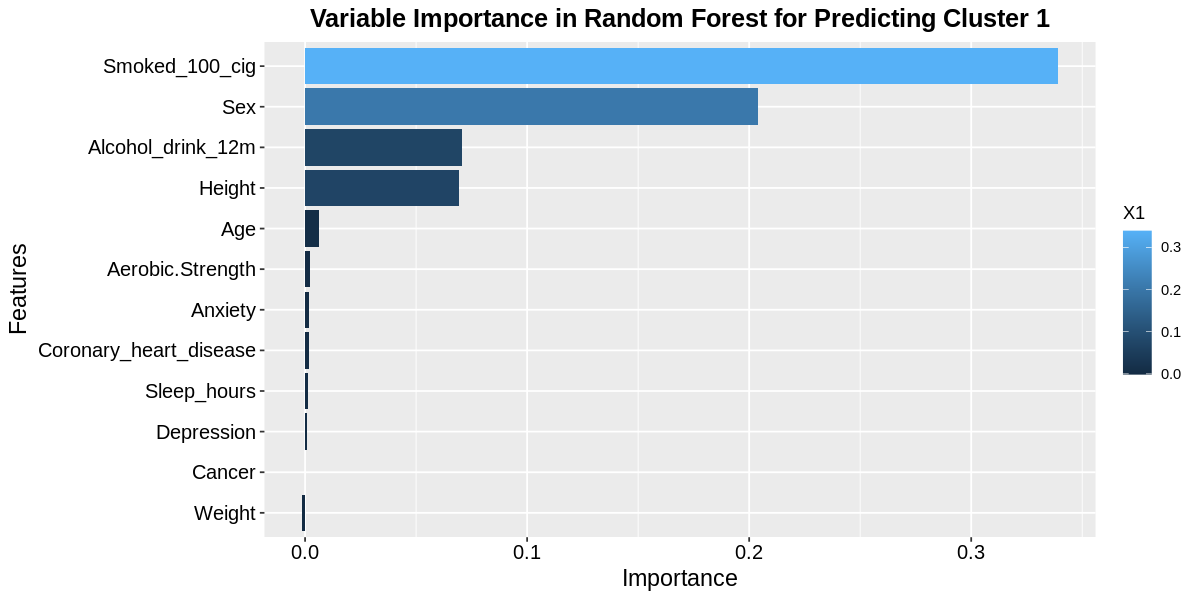

In [9]:
# Change plot dimensions to improve readability
options(repr.plot.width = 10, repr.plot.height = 5)

# Create a horizontal bar plot of variable importance
# - reorder() ensures features with the highest importance appear at the top
# - fill = importance maps bar color to importance values
ggplot(rf_impt, aes(x = reorder(rownames(rf_impt), X1), y = X1, fill = X1)) +
  # Create the chart
  geom_col() +
  # Flip the coordinates for a horizontal layout
  coord_flip() +
  # Add custom title and axis labels
  labs(title = "Variable Importance in Random Forest for Predicting Cluster 1", x = "Features", y = "Importance") +
  # Customize text size, color, and alignment
  theme(axis.text.x = element_text(size = 12, color = 'black'),
        axis.text.y = element_text(size = 12, color = 'black'),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        plot.title = element_text(size = 15.2, hjust = 0.5, face = 'bold'))

* The four most important features for predicting Cluster 1 are Smoked_100_cig, Sex, Alcohol_drink_12m, and Height.
* Cancer has near zero importance, meaning removing or keeping this feature has no effect on the model's ability to classify observations into Cluster 1.
* Weight seems to have negative importance, which would hurt model accuracy, meaning the model is more likely to misclassify observations when this feature is included.


#### Second Cluster

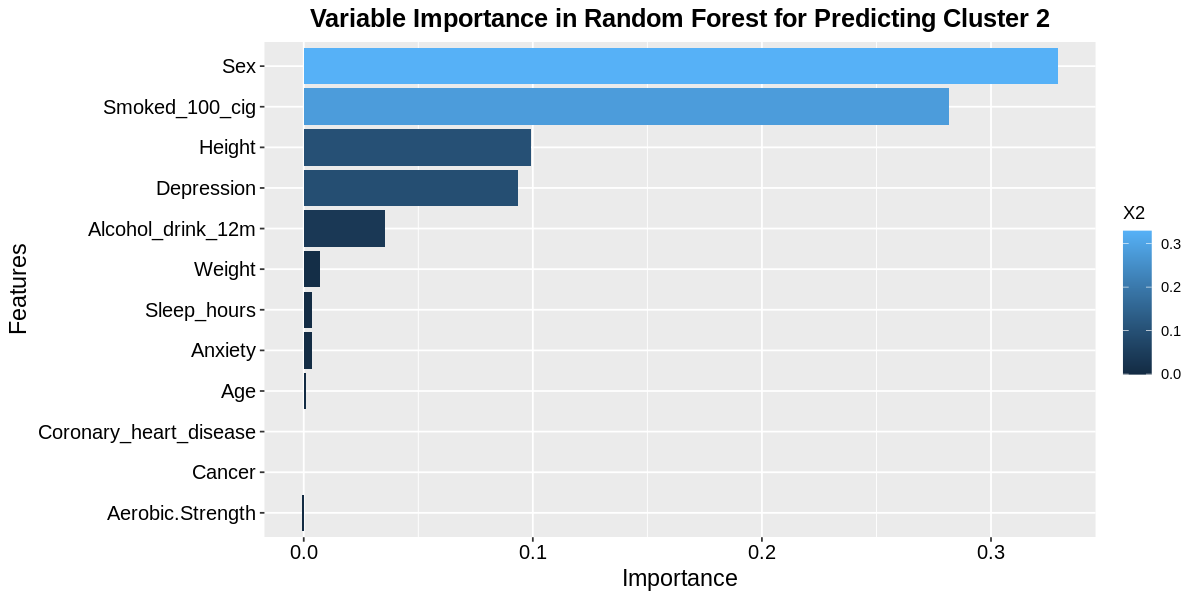

In [10]:
# Change plot dimensions to improve readability
options(repr.plot.width = 10, repr.plot.height = 5)

# Create a horizontal bar plot of variable importance
# - reorder() ensures features with the highest importance appear at the top
# - fill = importance maps bar color to importance values
ggplot(rf_impt, aes(x = reorder(rownames(rf_impt), X2), y = X2, fill = X2)) +
  # Create the chart
  geom_col() +
  # Flip the coordinates for a horizontal layout
  coord_flip() +
  # Add custom title and axis labels
  labs(title = "Variable Importance in Random Forest for Predicting Cluster 2", x = "Features", y = "Importance") +
  # Customize text size, color, and alignment
  theme(axis.text.x = element_text(size = 12, color = 'black'),
        axis.text.y = element_text(size = 12, color = 'black'),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        plot.title = element_text(size = 15.2, hjust = 0.5, face = 'bold'))

* The four most important features for predicting Cluster 2 are indeed Sex, Smoked_100_cig, Height, and Depression.
* Coronary_heart_disease and Cancer had near zero feature importance, meaning they mave not have contributed to the model's performance.
* Aerobic.Strength seems to have negative importance, indicating it could hinder the model from predicting correctly.


#### Third Cluster

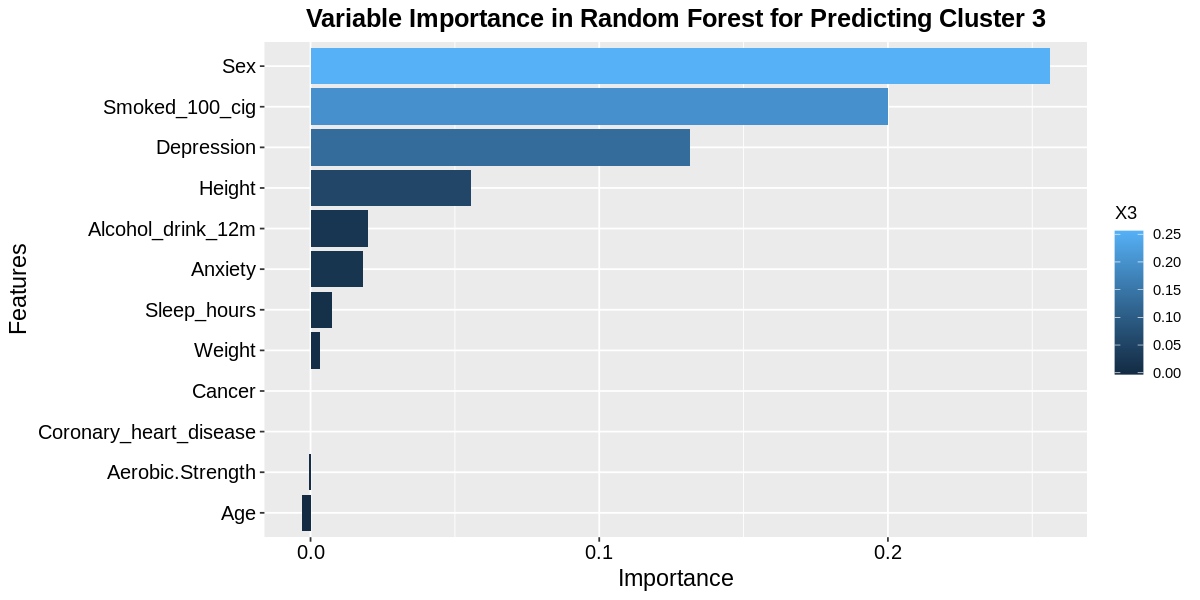

In [11]:
# Change plot dimensions to improve readability
options(repr.plot.width = 10, repr.plot.height = 5)

# Create a horizontal bar plot of variable importance
# - reorder() ensures features with the highest importance appear at the top
# - fill = importance maps bar color to importance values
ggplot(rf_impt, aes(x = reorder(rownames(rf_impt), X3), y = X3, fill = X3)) +
  # Create the chart
  geom_col() +
  # Flip the coordinates for a horizontal layout
  coord_flip() +
  # Add custom title and axis labels
  labs(title = "Variable Importance in Random Forest for Predicting Cluster 3", x = "Features", y = "Importance") +
  # Customize text size, color, and alignment
  theme(axis.text.x = element_text(size = 12, color = 'black'),
        axis.text.y = element_text(size = 12, color = 'black'),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        plot.title = element_text(size = 15.2, hjust = 0.5, face = 'bold'))

* The four most important features for predicting Cluster 3 were Sex, Smoked_100_cig, Depression, and Height.
* Coronary_heart_disease and Cancer seem to have near zero feature importance, indicating they may not have contributed to the model's performance.
* Aerobic.Strength and Age seem to have negative feature importance, indicating they both hurt the model's performance.

#### Fourth Cluster

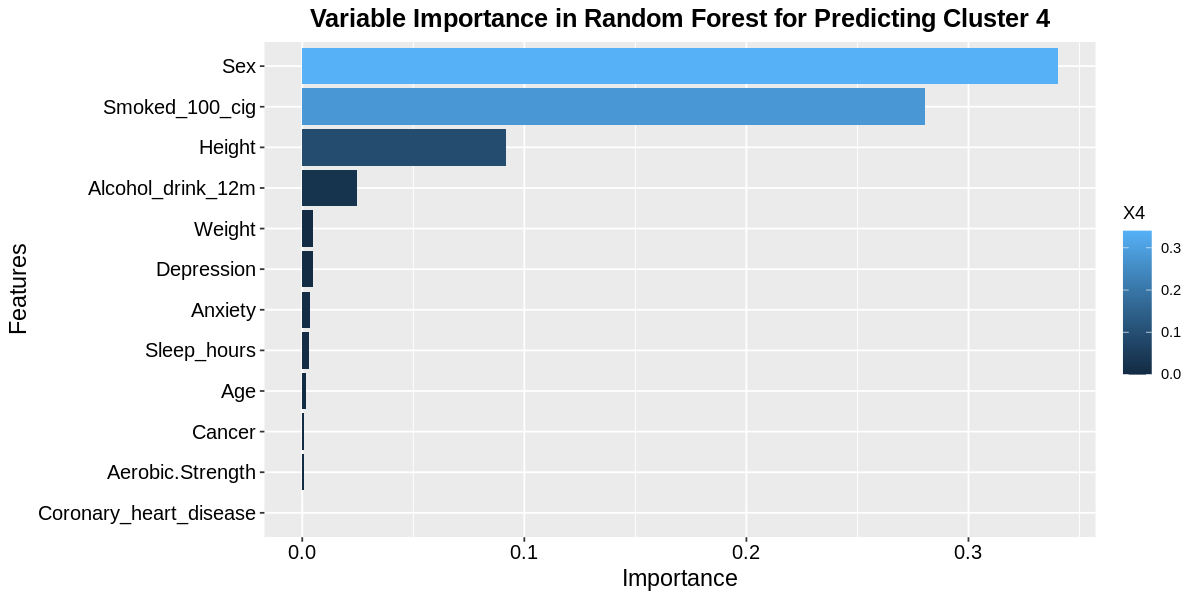

In [12]:
# Change plot dimensions to improve readability
options(repr.plot.width = 10, repr.plot.height = 5)

# Create a horizontal bar plot of variable importance
# - reorder() ensures features with the highest importance appear at the top
# - fill = importance maps bar color to importance values
ggplot(rf_impt, aes(x = reorder(rownames(rf_impt), X4), y = X4, fill = X4)) +
  # Create the chart
  geom_col() +
  # Flip the coordinates for a horizontal layout
  coord_flip() +
  # Add custom title and axis labels
  labs(title = "Variable Importance in Random Forest for Predicting Cluster 4", x = "Features", y = "Importance") +
  # Customize text size, color, and alignment
  theme(axis.text.x = element_text(size = 12, color = 'black'),
        axis.text.y = element_text(size = 12, color = 'black'),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        plot.title = element_text(size = 15.2, hjust = 0.5, face = 'bold'))

* The four most important features for predicting Cluster 4 were Sex, Smoked_100_cig, Height, and Alcohol_drink_12m.
* Coronary heart disease has near zero feature importance, indicating it may not have had any impact on the model's performance.

#### Mean Decrease in Accuracy

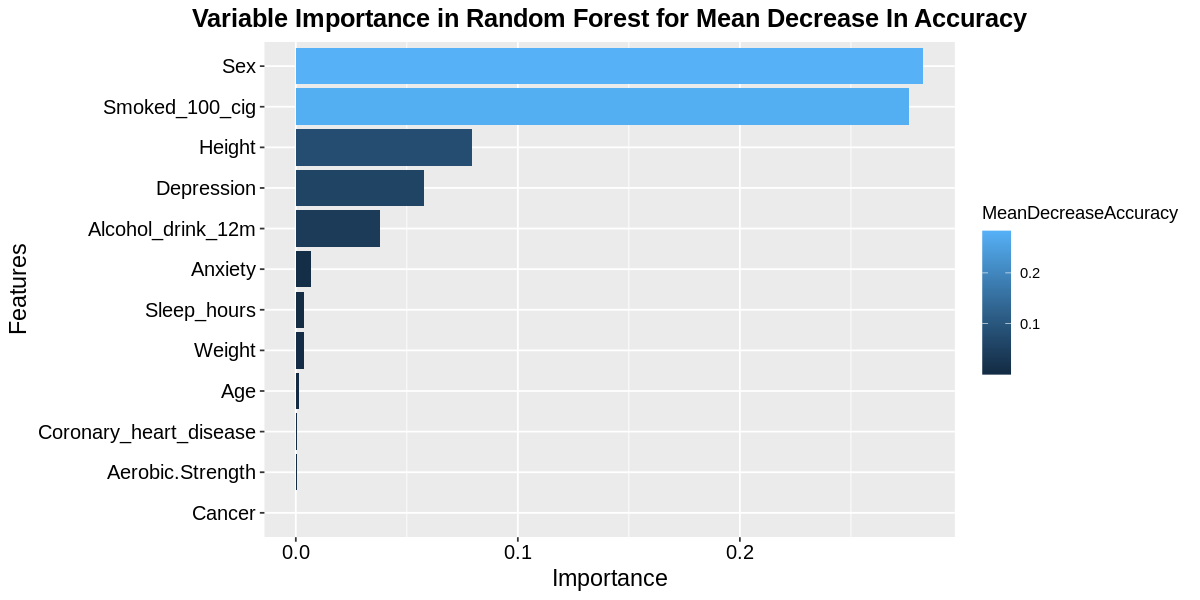

In [13]:
# Change plot dimensions to improve readability
options(repr.plot.width = 10, repr.plot.height = 5)

# Create a horizontal bar plot of variable importance
# - reorder() ensures features with the highest importance appear at the top
# - fill = importance maps bar color to importance values
ggplot(rf_impt, aes(x = reorder(rownames(rf_impt), MeanDecreaseAccuracy), y = MeanDecreaseAccuracy, fill = MeanDecreaseAccuracy)) +
  # Create the chart
  geom_col() +
  # Flip the coordinates for a horizontal layout
  coord_flip() +
  # Add custom title and axis labels
  labs(title = "Variable Importance in Random Forest for Mean Decrease In Accuracy", x = "Features", y = "Importance") +
  # Customize text size, color, and alignment
  theme(axis.text.x = element_text(size = 12, color = 'black'),
        axis.text.y = element_text(size = 12, color = 'black'),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        plot.title = element_text(size = 15.2, hjust = 0.5, face = 'bold'))

Each value represents how the model's performance is affected when the feature is removed. Features with higher values negatively impact the model's accuracy the most when excluded, whereas features with smaller values have a lesser impact.
* The four most important features, whose removal most significantly reduces model performance, are Sex, Smoked_100_cig, Height, and Depression.
* Cancer seems to have a near-zero value, indicating that the model's performance isn't really impacted whether the Cancer variable is included or removed.

#### Mean Decrease in Gini Index

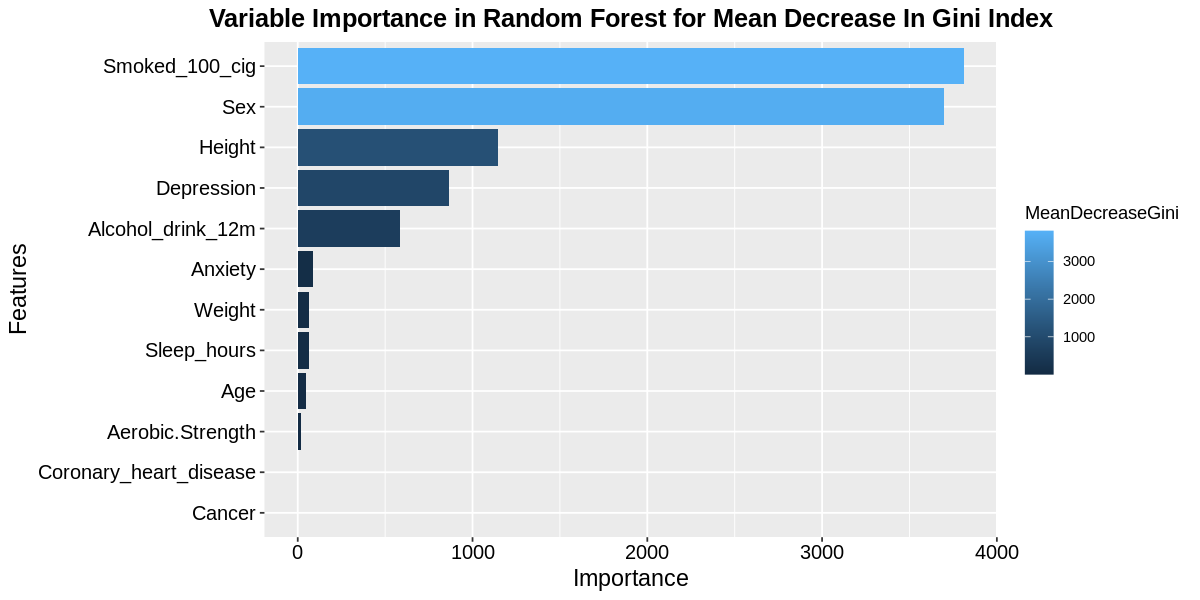

In [14]:
# Change plot dimensions to improve readability
options(repr.plot.width = 10, repr.plot.height = 5)

# Create a horizontal bar plot of variable importance
# - reorder() ensures features with the highest importance appear at the top
# - fill = importance maps bar color to importance values
ggplot(rf_impt, aes(x = reorder(rownames(rf_impt), MeanDecreaseGini), y = MeanDecreaseGini, fill = MeanDecreaseGini)) +
  # Create the chart
  geom_col() +
  # Flip the coordinates for a horizontal layout
  coord_flip() +
  # Add custom title and axis labels
  labs(title = "Variable Importance in Random Forest for Mean Decrease In Gini Index", x = "Features", y = "Importance") +
  # Customize text size, color, and alignment
  theme(axis.text.x = element_text(size = 12, color = 'black'),
        axis.text.y = element_text(size = 12, color = 'black'),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        plot.title = element_text(size = 15.2, hjust = 0.5, face = 'bold'))

Higher values indicate that a feature contributes to purer splits within the clusters, meaning it helps the model distinguish between groups more effectively. Smaller values indicate that the feature results in less pure splits, meaning it has a weaker role in separating clusters.

An example of a purer split would be (.80, .1, 0, .1), where 80% of the data belongs to one category. In contrast, (.25, .25, .3, .2) represents a less pure split, where a category is still the most common but not as dominant.

* The four most important features are Smoked_100_cig, Sex, Height, and Depression, indicating they result in the purest splits.
* Coronary_heart_disease and Cancer have near-zero importance, meaning they contribute little to differentiating clusters.


## Naming Clusters

1. Cluster 1 : Older Male, Experienced Smokers, Most Frequent Drinkers.
 * Older, mainly male demographic with the highest frequency of alcohol consumption in the past 12 months, along with having smoked 100 cigarettes in their lifetime. Generally taller and heavier, and tend to average less sleep.

2. Cluster 2 : Least Frequent Drinking Females.
 * Slightly younger, mainly female individuals, with lower body weight and height. Reporting lowest days drinking in past 12 months and have not smoked 100 cigarettes in their lifetime.

3. Cluster 3 : Experienced Female Smokers, Highest Average Sleep
 * Middle of the pack age group, mainly female, who are generally shorter and lighter. Reported highest average sleep with large amount having smoked 100 cigarettes. Small number of days drank in the past 12 months, and mixed patterns of depression and anxious thoughts.   

4. Cluster 4 : Youngest, Tallest Males.
 * Youngest group, primarily male, and is the heaviest and tallest. Moderate days drank in the past 12 month and many haven't smoked 100 cigarettes.

## Conclusion

This notebook succesfully interpreted the four clusters gotten from the **[umap kmeans hlucst](https://github.com/Cstan1987stat/health-survey-cluster-analysis/blob/main/notebooks/umap_kmeans_hclust.ipynb)** notebook. These clusters were determine to be:
* Cluster 1 : Older Male, Experienced Smokers, and Most Frequent Drinkers - Being the oldest average group and mainly male, this group also have the highest frequency in days drank in the past 12 months.
* Cluster 2 : Least Frequent Drinking Females - Mainly female individuals with lower body weight and height, notable for the lowest frequency in days drank in the past 12 months and large amount who have not smoked 100 cigarettes.
* Cluster 3 : Experienced Female Smokers, Highest Average Sleep - Middle-aged, mainly female, shorter and lighter, highest average sleep hours, and mix of depression and anxious thoughts.
* Cluster 4 : Youngest, Tallest Males - The youngest and tallest group, mainly male, exhibiting moderate frequency of days drank and no history of smoking.

A notable similarity across all four clusters is that the highest proportion in each group did not meet either strength or aerobic activity guidelines. This significant finding highlights a common area for potential intervention: each identified group could possibly be targeted with tailored exercise material and encouragement to improve physical activity levels. Understanding these distinct segments is vital for developing effective, targeted public health strategies that can address specific health behaviors and promote overall well-being wthin the population.